In [3]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
def residuals_plot(mod, dataset, Y_name,subset):
    #Variables that will be needed for plotting
    if Y_name =='gIn':
        name_variable = 'glucose'
    elif Y_name =='iIn':
        name_variable = 'insulin'
    residuals = mod.resid
    y_fitted = mod.fittedvalues
    row = []
    for i in range(np.array(dataset[Y_name]).size):
        row.append(i)

    #CASE ORDER PLOTS OF RESIDUALS

    fig1=sns.residplot(x=row, y=residuals)
    plt.title(f'{subset}-{name_variable}: Case order plot of residuals')
    plt.ylabel('Residuals')
    plt.xlabel('Row Number')
    plt.show()

    #PLOT OF RESIDUALS VS. FITTED VALUES
    fig2=sns.residplot(x=y_fitted, y=residuals)
    plt.title(f'{subset}-{name_variable}: Plot of residuals vs. fitted values')
    plt.ylabel('Residuals')
    plt.xlabel('Fitted Values')
    plt.show()


    #HISTOGRAM PLOT OF RESIDUALS
    fig3=plt.hist(residuals,list(np.linspace(round(min(residuals))-10, round(max(residuals))+10,7)),density=True)  
    plt.title(f'{subset}-{name_variable}: Histograms of residuals')
    plt.ylabel('Frequency')
    plt.xlabel('Residuals')
    plt.show()

    #NORMAL PROBABILITY PLOT
    pplot1 = sm.ProbPlot(residuals)
    pplot1.qqplot(line='s')
    plt.title(f'{subset}-{name_variable}: Normal Probability Plot')
    return fig1, fig2, fig3

# C


# F-test

In [5]:
alpha = 0.05  
sample_num = 20
num_samples = 20
num_params = 3
f_critical = stats.f.ppf(1-alpha, num_params-1, num_samples-num_params)
print("F critical value:", f_critical)

F critical value: 3.5915305684750827


Asymptomatic 

In [6]:

data_asymptomatic = pd.read_csv('./Asymptomatic_Subjects.csv')
data_glucose_a = data_asymptomatic[['gIn','gOut','iOut']]
data_glucose_a['giOut'] = data_asymptomatic['gOut']*data_asymptomatic['iOut']
data_isulin_a = data_asymptomatic[['iIn','gOut','iOut']]

In [7]:
model_glucose_a = ols('gIn ~ 1+gOut+giOut', data=data_glucose_a).fit()
print(model_glucose_a.summary())

                            OLS Regression Results                            
Dep. Variable:                    gIn   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     5.533
Date:                Sun, 10 Nov 2024   Prob (F-statistic):             0.0141
Time:                        15:41:47   Log-Likelihood:                -149.91
No. Observations:                  20   AIC:                             305.8
Df Residuals:                      17   BIC:                             308.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7466.2356   3085.688     -2.420      0.0

Plot our fitted model and data point

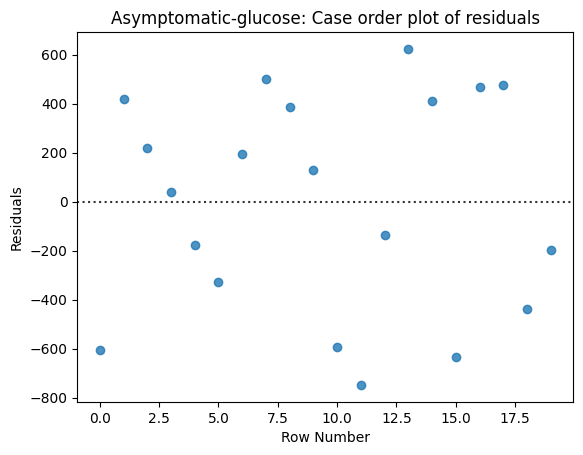

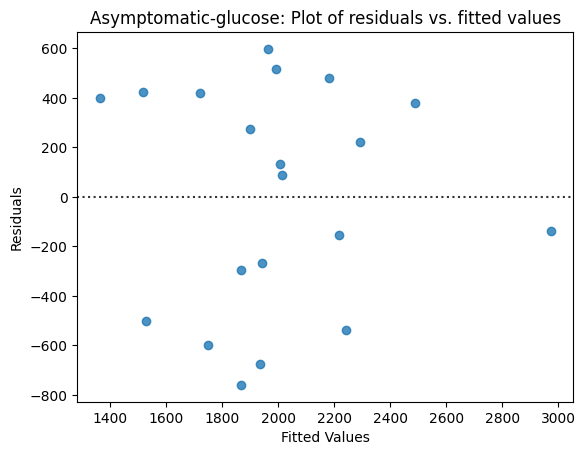

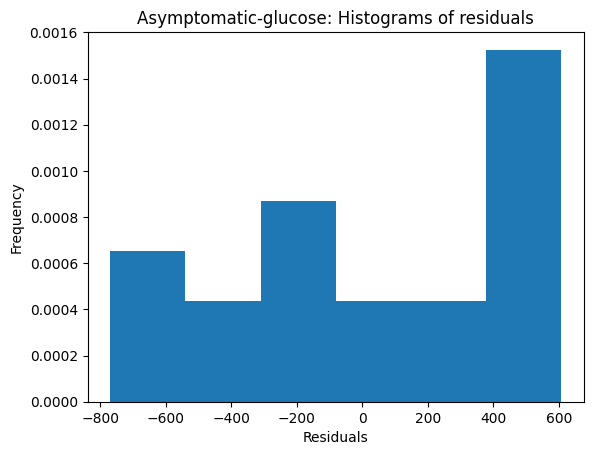

(<Axes: title={'center': 'Asymptomatic-glucose: Case order plot of residuals'}, xlabel='Row Number', ylabel='Residuals'>,
 <Axes: title={'center': 'Asymptomatic-glucose: Plot of residuals vs. fitted values'}, xlabel='Fitted Values', ylabel='Residuals'>,
 (array([0.00065359, 0.00043573, 0.00087146, 0.00043573, 0.00043573,
         0.00152505]),
  array([-770. , -540.5, -311. ,  -81.5,  148. ,  377.5,  607. ]),
  <BarContainer object of 6 artists>))

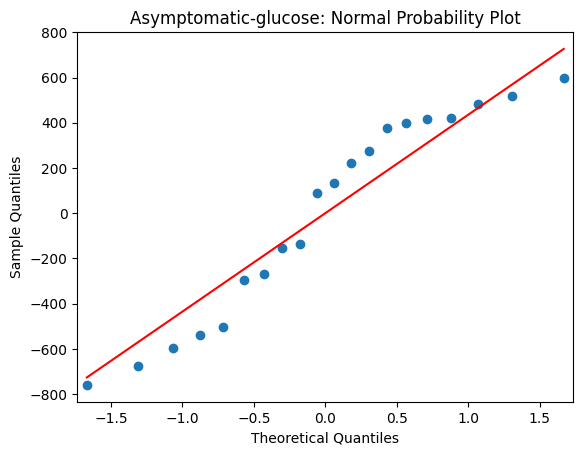

In [8]:
residuals_plot(model_glucose_a,data_asymptomatic,'gIn','Asymptomatic')

In [9]:
model_isulin_a = ols('iIn ~ 1+iOut+gOut', data=data_isulin_a).fit()
print(model_isulin_a.summary())

                            OLS Regression Results                            
Dep. Variable:                    iIn   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     4.136
Date:                Sun, 10 Nov 2024   Prob (F-statistic):             0.0344
Time:                        15:41:48   Log-Likelihood:                -99.499
No. Observations:                  20   AIC:                             205.0
Df Residuals:                      17   BIC:                             208.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    731.5407    260.817      2.805      0.0

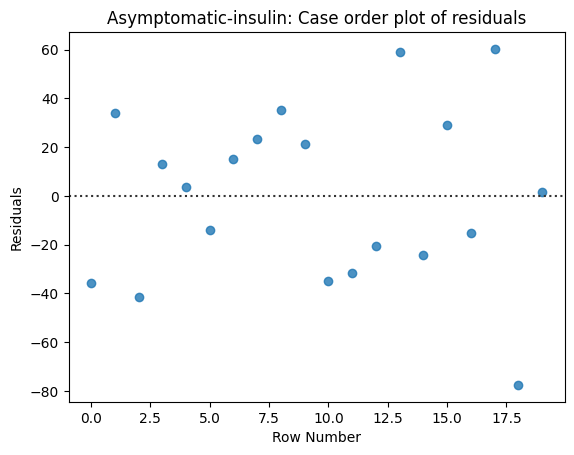

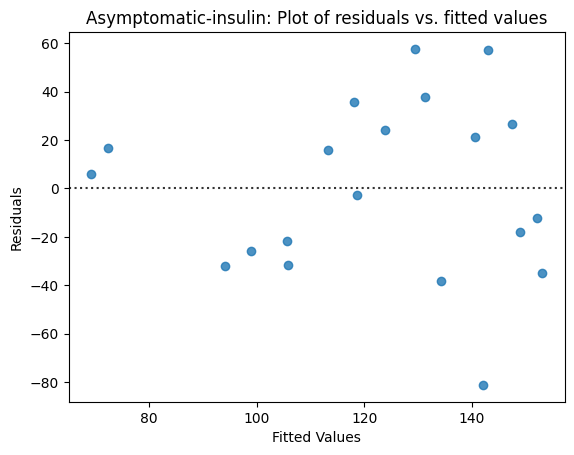

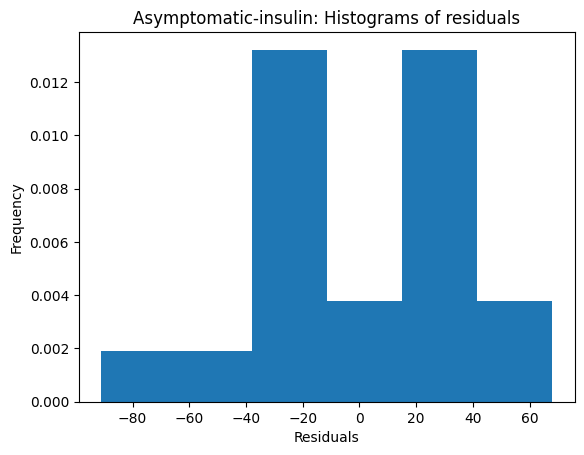

(<Axes: title={'center': 'Asymptomatic-insulin: Case order plot of residuals'}, xlabel='Row Number', ylabel='Residuals'>,
 <Axes: title={'center': 'Asymptomatic-insulin: Plot of residuals vs. fitted values'}, xlabel='Fitted Values', ylabel='Residuals'>,
 (array([0.00188679, 0.00188679, 0.01320755, 0.00377358, 0.01320755,
         0.00377358]),
  array([-91. , -64.5, -38. , -11.5,  15. ,  41.5,  68. ]),
  <BarContainer object of 6 artists>))

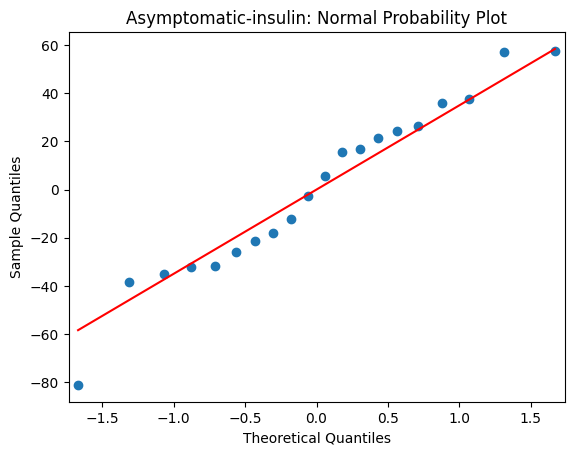

In [10]:
residuals_plot(model_isulin_a,data_asymptomatic,'iIn','Asymptomatic')

Type I

In [11]:
data_I = pd.read_csv('TypeI_Subjects.csv')
data_glucose_I = data_I[['gIn','gOut','iOut']]
data_isulin_I = data_I[['iIn','gOut','iOut']]
data_glucose_I['giOut'] = data_glucose_I['gOut']*data_glucose_I['iOut']

In [12]:
model_glucose_I = ols('gIn ~ 1+gOut+giOut', data=data_glucose_I).fit()
print(model_glucose_I.summary())

                            OLS Regression Results                            
Dep. Variable:                    gIn   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     3.969
Date:                Sun, 10 Nov 2024   Prob (F-statistic):             0.0385
Time:                        15:41:49   Log-Likelihood:                -152.67
No. Observations:                  20   AIC:                             311.3
Df Residuals:                      17   BIC:                             314.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2291.4959   1761.490     -1.301      0.2

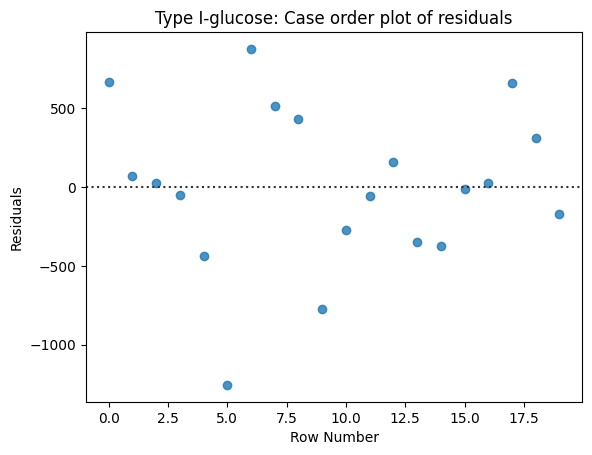

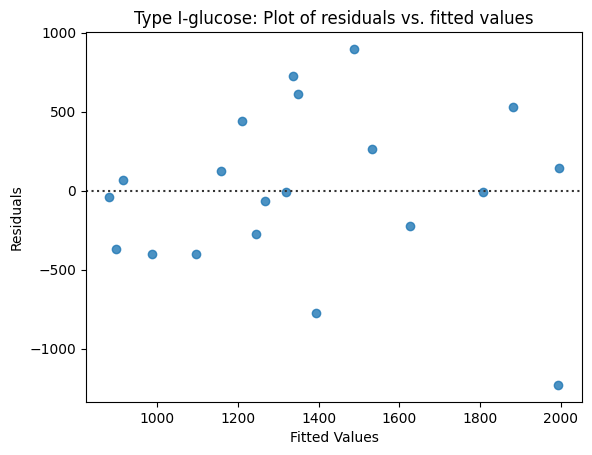

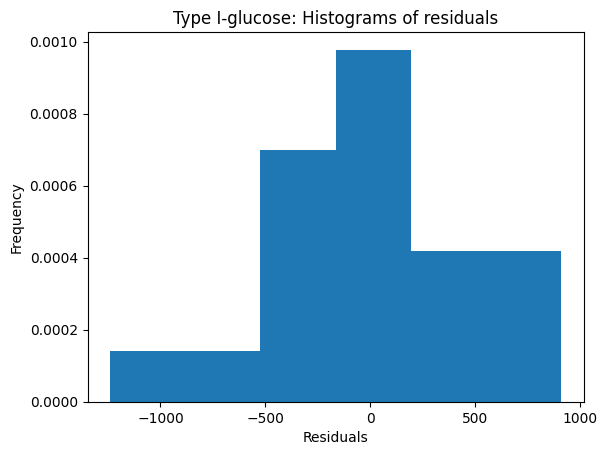

(<Axes: title={'center': 'Type I-glucose: Case order plot of residuals'}, xlabel='Row Number', ylabel='Residuals'>,
 <Axes: title={'center': 'Type I-glucose: Plot of residuals vs. fitted values'}, xlabel='Fitted Values', ylabel='Residuals'>,
 (array([0.00013966, 0.00013966, 0.00069832, 0.00097765, 0.00041899,
         0.00041899]),
  array([-1240.,  -882.,  -524.,  -166.,   192.,   550.,   908.]),
  <BarContainer object of 6 artists>))

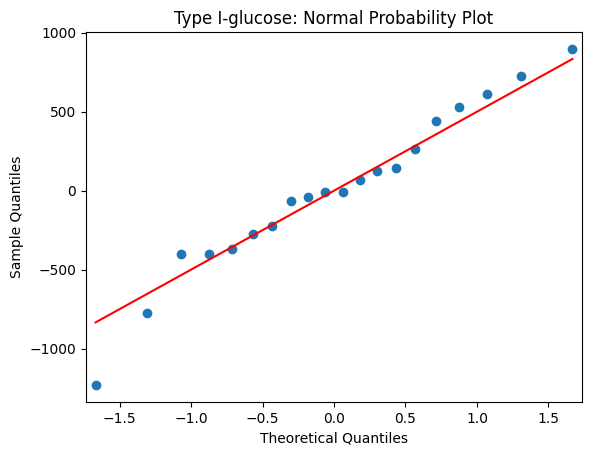

In [13]:
residuals_plot(model_glucose_I,data_I,'gIn','Type I')

In [14]:
model_insulin_I = ols('iIn ~ 1+iOut+gOut', data=data_isulin_I).fit()
print(model_insulin_I.summary())

                            OLS Regression Results                            
Dep. Variable:                    iIn   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     53.70
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           4.49e-08
Time:                        15:41:50   Log-Likelihood:                -93.630
No. Observations:                  20   AIC:                             193.3
Df Residuals:                      17   BIC:                             196.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    937.6001    122.087      7.680      0.0

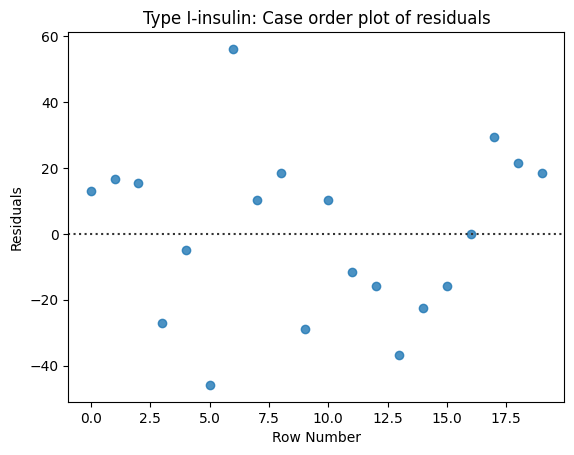

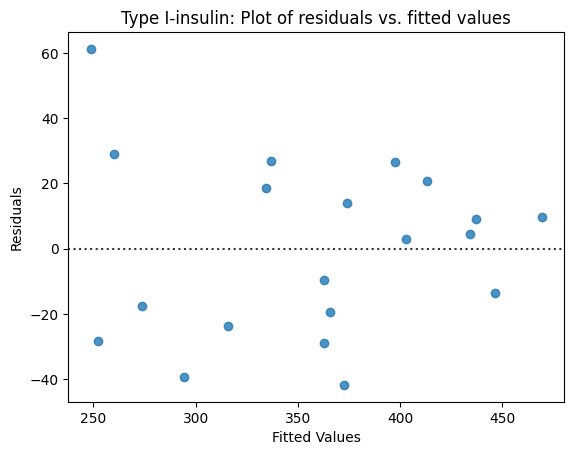

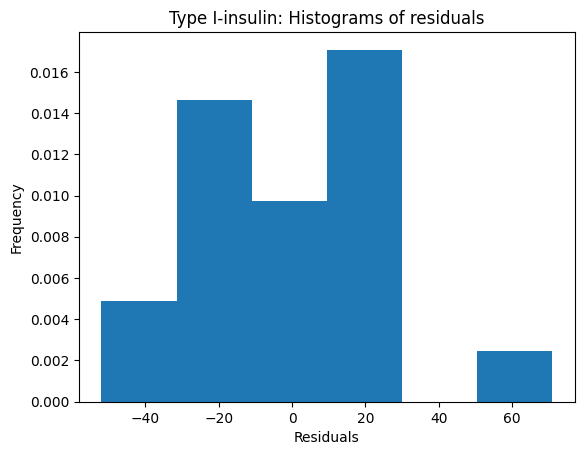

(<Axes: title={'center': 'Type I-insulin: Case order plot of residuals'}, xlabel='Row Number', ylabel='Residuals'>,
 <Axes: title={'center': 'Type I-insulin: Plot of residuals vs. fitted values'}, xlabel='Fitted Values', ylabel='Residuals'>,
 (array([0.00487805, 0.01463415, 0.0097561 , 0.01707317, 0.        ,
         0.00243902]),
  array([-52. , -31.5, -11. ,   9.5,  30. ,  50.5,  71. ]),
  <BarContainer object of 6 artists>))

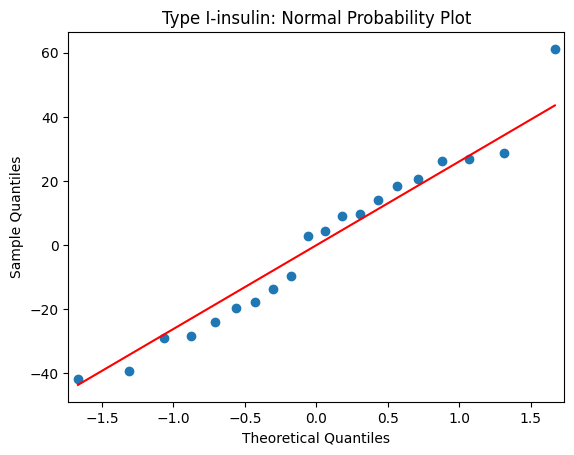

In [15]:
residuals_plot(model_insulin_I,data_I,'iIn','Type I')

Type II

In [16]:
data_II = pd.read_csv('TypeII_Subjects.csv')
data_glucose_II = data_II[['gIn','gOut','iOut']]
data_glucose_II['giOut'] = data_glucose_II['gOut']*data_glucose_II['iOut']
data_isulin_II = data_II[['iIn','gOut','iOut']]

In [17]:
model_glucose_II = ols('gIn ~ 1+gOut+giOut', data=data_glucose_II).fit()
print(model_glucose_II.summary())

                            OLS Regression Results                            
Dep. Variable:                    gIn   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     24.17
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           1.07e-05
Time:                        15:41:50   Log-Likelihood:                -140.69
No. Observations:                  20   AIC:                             287.4
Df Residuals:                      17   BIC:                             290.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.007e+04   2121.908     -4.747      0.0

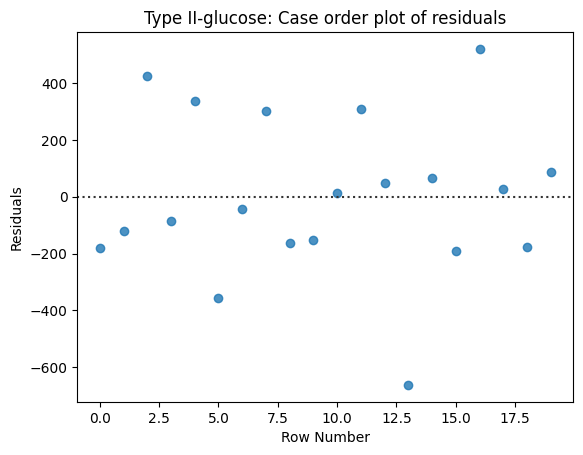

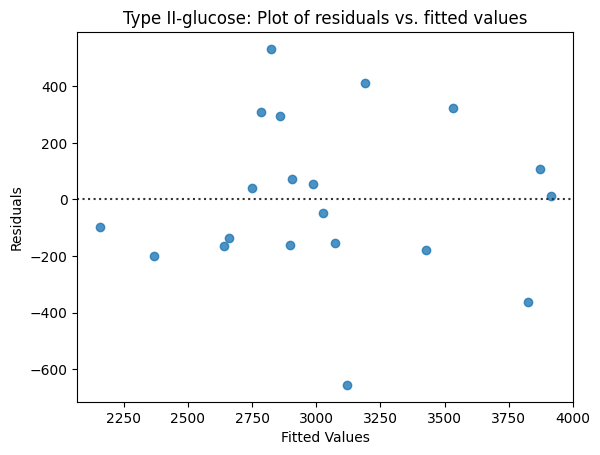

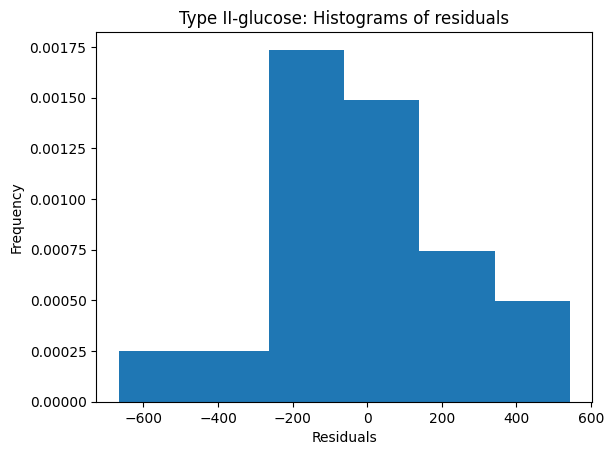

(<Axes: title={'center': 'Type II-glucose: Case order plot of residuals'}, xlabel='Row Number', ylabel='Residuals'>,
 <Axes: title={'center': 'Type II-glucose: Plot of residuals vs. fitted values'}, xlabel='Fitted Values', ylabel='Residuals'>,
 (array([0.00024814, 0.00024814, 0.00173697, 0.00148883, 0.00074442,
         0.00049628]),
  array([-666. , -464.5, -263. ,  -61.5,  140. ,  341.5,  543. ]),
  <BarContainer object of 6 artists>))

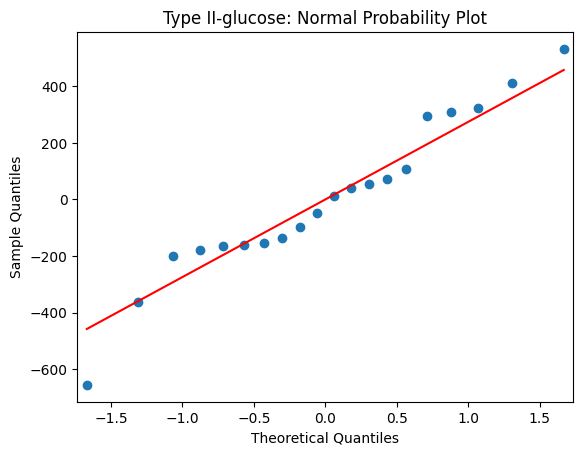

In [18]:
residuals_plot(model_glucose_II,data_II,'gIn','Type II')

In [19]:
model_insulin_II = ols('iIn ~ 1+iOut+gOut', data=data_isulin_II).fit()
print(model_insulin_II.summary())

                            OLS Regression Results                            
Dep. Variable:                    iIn   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     9.850
Date:                Sun, 10 Nov 2024   Prob (F-statistic):            0.00144
Time:                        15:41:51   Log-Likelihood:                -102.87
No. Observations:                  20   AIC:                             211.7
Df Residuals:                      17   BIC:                             214.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1024.2849    373.635      2.741      0.0

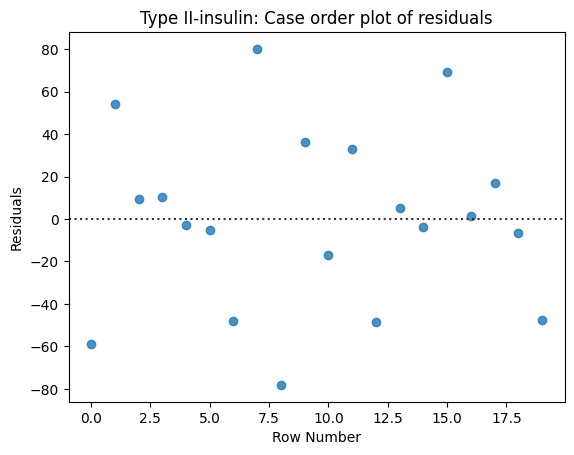

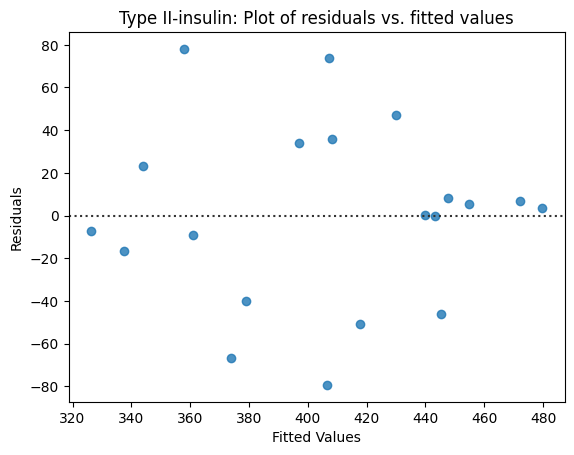

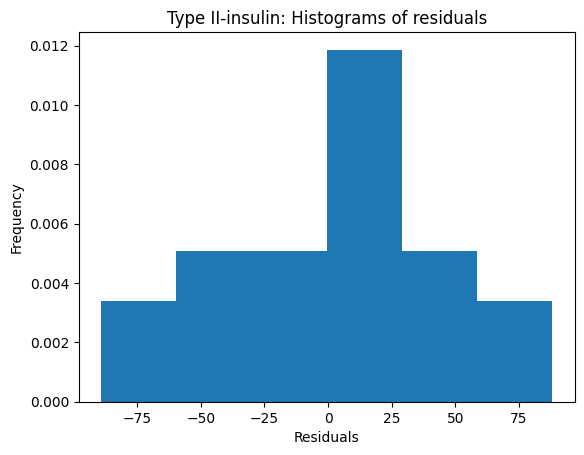

(<Axes: title={'center': 'Type II-insulin: Case order plot of residuals'}, xlabel='Row Number', ylabel='Residuals'>,
 <Axes: title={'center': 'Type II-insulin: Plot of residuals vs. fitted values'}, xlabel='Fitted Values', ylabel='Residuals'>,
 (array([0.00338983, 0.00508475, 0.00508475, 0.01186441, 0.00508475,
         0.00338983]),
  array([-89. , -59.5, -30. ,  -0.5,  29. ,  58.5,  88. ]),
  <BarContainer object of 6 artists>))

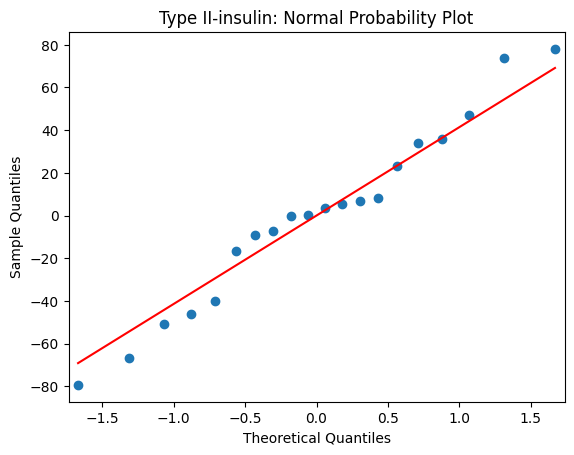

In [20]:
residuals_plot(model_insulin_II,data_II,'iIn','Type II')

# E

In [21]:
glucose_fomula = ['gIn ~ gOut+giOut','gIn ~ 1+gOut','gIn ~ 1+giOut']
isulin_fomula = ['iIn ~ iOut+gOut','iIn ~ 1+gOut','iIn ~ 1+iOut']

asymptomatic

Glucose

In [23]:
print(f"Full model F value:{model_glucose_a.fvalue}\n")
print("Reduce model F value on asymptomatic")
for fomula in glucose_fomula:
    print('________________'*2)
    model_glucose_r = ols(fomula, data=data_glucose_a).fit()
    print("Reduced model:",fomula)
    print("F-statistics:",model_glucose_r.fvalue)

Full model F value:5.533326301305839

Reduce model F value on asymptomatic
________________________________
Reduced model: gIn ~ gOut+giOut
F-statistics: 5.533326301305839
________________________________
Reduced model: gIn ~ 1+gOut
F-statistics: 7.626173541526137
________________________________
Reduced model: gIn ~ 1+giOut
F-statistics: 2.785328696231792


Insulin

In [35]:
print(f"Full model F value:{model_isulin_a.fvalue}\n")
print("Reduce model F value on asymptomatic")
for fomula in isulin_fomula:
    print('________________'*2)
    model_isulin_r = ols(fomula, data=data_isulin_a).fit()
    print(fomula)
    print("F-statistics:",model_isulin_r.fvalue)

Full model F value:4.13614660335206

Reduce model F value on asymptomatic
________________________________
iIn ~ iOut+gOut
F-statistics: 4.13614660335206
________________________________
iIn ~ 1+gOut
F-statistics: 7.751733782237714
________________________________
iIn ~ 1+iOut
F-statistics: 0.9860239070284085


Tyep I

Glucose

In [36]:
print(f"Full model F value:{model_glucose_I.fvalue}\n")
print("Reduce model F value on asymptomatic")
for fomula in glucose_fomula:
    print('________________'*2)
    model_glucose_r = ols(fomula, data=data_glucose_a).fit()
    print("Reduced model",fomula)
    print("F-statistics:",model_glucose_r.fvalue)

Full model F value:3.9689552233087

Reduce model F value on asymptomatic
________________________________
Reduced model gIn ~ gOut+giOut
F-statistics: 5.533326301305839
________________________________
Reduced model gIn ~ 1+gOut
F-statistics: 7.626173541526137
________________________________
Reduced model gIn ~ 1+giOut
F-statistics: 2.785328696231792


Isulin

In [37]:
print(f"Full model F value:{model_isulin_I.fvalue}\n")
print("Reduce model F value on asymptomatic")
for fomula in isulin_fomula:
    print('________________'*2)
    model_isulin_r = ols(fomula, data=data_isulin_a).fit()
    print(fomula)
    print("F-statistics:",model_isulin_r.fvalue)

Full model F value:53.70297970855455

Reduce model F value on asymptomatic
________________________________
iIn ~ iOut+gOut
F-statistics: 4.13614660335206
________________________________
iIn ~ 1+gOut
F-statistics: 7.751733782237714
________________________________
iIn ~ 1+iOut
F-statistics: 0.9860239070284085


Type II

Glucose

In [38]:
print(f"Full model F value:{model_glucose_II.fvalue}\n")
print("Reduce model F value on asymptomatic")
for fomula in glucose_fomula:
    print('________________'*2)
    model_glucose_r = ols(fomula, data=data_glucose_a).fit()
    print("Reduced model",fomula)
    print("F-statistics:",model_glucose_r.fvalue)

Full model F value:24.1722390451321

Reduce model F value on asymptomatic
________________________________
Reduced model gIn ~ gOut+giOut
F-statistics: 5.533326301305839
________________________________
Reduced model gIn ~ 1+gOut
F-statistics: 7.626173541526137
________________________________
Reduced model gIn ~ 1+giOut
F-statistics: 2.785328696231792


Insulin

In [39]:
print(f"Full model F value:{model_isulin_II.fvalue}\n")
print("Reduce model F value on asymptomatic")
for fomula in isulin_fomula:
    print('________________'*2)
    model_isulin_r = ols(fomula, data=data_isulin_a).fit()
    print(fomula)
    print("F-statistics:",model_isulin_r.fvalue)

NameError: name 'model_isulin_II' is not defined